<a href="https://colab.research.google.com/github/gabriellarumapea/Hands-On-Pemrosesan-Audio/blob/main/Tugas_1/122140056_GabriellaRumapea_TugasMultimedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Analisis Multimedia: Audio, Gambar, Video

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:**   Gabriella Natalya Rumapea
**NIM:** 122140056

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami representasi dasar data multimedia (audio, gambar, dan video) melalui praktik langsung memuat data, visualisasi, dan ekstraksi informasi fundamental. Anda akan bekerja dengan tiga jenis media berbeda untuk menganalisis karakteristik temporal (audio), spasial (gambar), dan spatio-temporal (video).

Fokus tugas adalah pada pemahaman konsep dasar representasi multimedia dan kemampuan interpretasi hasil visualisasi, **bukan** pada manipulasi atau transformasi lanjutan data multimedia.

---

## ⚠️ CATATAN PENTING: PRESENTASI ACAK & KEJUJURAN AKADEMIK

**Sebagian mahasiswa akan dipilih secara ACAK untuk presentasi singkat** (5-10 menit) menjelaskan kode dan interpretasi hasil mereka. Jika Anda:
- Tidak mampu menjelaskan kode yang Anda kumpulkan
- Hanya menyalin-tempel tanpa pemahaman
- Bergantung sepenuhnya pada AI tanpa memahami konsep

**Maka nilai tugas Anda akan diberikan 0 (nol).**

Gunakan referensi dan AI sebagai alat bantu pembelajaran, tetapi pastikan Anda memahami setiap baris kode dan dapat menjelaskan logika di baliknya.

In [ ]:
# Import Library (Satu-satunya sel kode dalam template ini)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from PIL import Image
import cv2
from IPython.display import Audio, HTML, display
import os

# Set matplotlib untuk menampilkan plot inline
%matplotlib inline

# Tampilkan versi library untuk dokumentasi
print("Library versions:")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"OpenCV: {cv2.__version__}")

Library versions:
NumPy: 2.2.3
Matplotlib: 3.10.6
Librosa: 0.11.0
OpenCV: 4.12.0


## Petunjuk Umum Pengerjaan

### 📋 Cara Menggunakan Template
- Gunakan notebook ini sebagai kerangka kerja utama
- Tulis penjelasan (markdown) **SEBELUM** menaruh kode agar maksud dan tujuan jelas
- Tambahkan sel kode di tempat yang sudah disediakan (tandai dengan TODO)
- Semua plot/gambar harus diberi judul, label sumbu, dan keterangan singkat

### 📊 Standar Visualisasi
- Setiap plot harus memiliki judul yang deskriptif
- Label sumbu X dan Y harus jelas
- Gunakan colorbar untuk plot yang memerlukan skala warna
- Berikan interpretasi singkat setelah setiap visualisasi

### 📂 Struktur Data yang Direkomendasikan
- Buat folder `data/` di direktori yang sama dengan notebook
- Gunakan nama file yang deskriptif (contoh: `audio_musik_piano.wav`, `gambar_pemandangan_gunung.jpg`)
- Dokumentasikan sumber data jika menggunakan dataset publik

### ⚠️ Larangan
- **Jangan** menaruh seluruh pekerjaan dalam satu sel kode yang sangat panjang
- **Jangan** menempel hasil output tanpa interpretasi atau analisis
- **Jangan** bergantung sepenuhnya pada AI - pahami dan kuasai kode Anda

### 🎯 Persiapan Presentasi Acak
- Pastikan Anda memahami setiap baris kode yang ditulis
- Latih menjelaskan logika dan alur pemikiran Anda
- Siapkan penjelasan untuk setiap visualisasi dan interpretasinya

## Checklist Kelengkapan (Centang ✅ saat selesai)

### 🎵 Bagian Audio
- [✅] Muat audio dan tampilkan metadata (durasi, sample rate, jumlah kanal)
- [✅] Tampilkan waveform dengan label sumbu yang jelas
- [✅] Tampilkan spectrogram dalam skala log-dB dengan colorbar
- [✅] Tampilkan MFCC (minimal 13 koefisien) sebagai heatmap
- [✅] Berikan interpretasi dan analisis untuk setiap visualisasi audio

### 🖼️ Bagian Gambar
- [✅] Tampilkan gambar dengan benar dalam format RGB
- [✅] Tampilkan informasi dasar (dimensi, jumlah kanal, dtype)
- [✅] Tampilkan histogram warna untuk channel R, G, B
- [✅] Berikan analisis hubungan histogram dengan kesan visual gambar

### 📹 Bagian Video
- [✅] Tampilkan metadata video (resolusi, fps, frame count, durasi)
- [✅] Tampilkan 3 frame representatif (awal, tengah, akhir)
- [✅] Konversi BGR ke RGB dengan benar untuk visualisasi
- [✅] Analisis kesesuaian parameter video dengan use case

### 📝 Analisis & Dokumentasi
- [✅] Setiap bagian memiliki interpretasi dan analisis ringkas
- [✅] Perbandingan representasi ketiga jenis media
- [✅] Kesimpulan pembelajaran dan refleksi
- [✅] Semua sumber data dan referensi dicantumkan

# Pendahuluan

## Apa itu Data Multimedia?

Data multimedia adalah informasi yang dikodekan dalam berbagai format untuk merepresentasikan dunia nyata:

- **Audio (1D)**: Sinyal satu dimensi yang berubah terhadap waktu
  - Contoh: musik, suara, speech
  - Representasi: amplitudo vs waktu
  
- **Gambar (2D)**: Matriks nilai intensitas dalam ruang dua dimensi
  - Contoh: foto, ilustrasi, grafik
  - Representasi: intensitas pixel pada koordinat (x,y)
  
- **Video (2D + Waktu)**: Rangkaian frame (gambar) yang ditampilkan berurutan
  - Contoh: film, rekaman, animasi
  - Representasi: frame berubah terhadap waktu dengan frame rate tertentu

## Tujuan Tugas

Memahami representasi dasar dan teknik visualisasi fundamental untuk setiap jenis media multimedia, termasuk:
- Cara memuat dan membaca file multimedia
- Ekstraksi informasi metadata yang penting
- Visualisasi yang informatif dan mudah dipahami
- Interpretasi hasil analisis secara kontekstual

## Cara Kerja

1. Isi setiap bagian sesuai instruksi yang diberikan
2. Tambahkan sel kode di tempat yang ditandai dengan "TODO"
3. Berikan interpretasi dan analisis setelah setiap visualisasi
4. Pastikan semua plot memiliki judul, label, dan keterangan yang jelas

# Bagian A — Audio

### A1. Deskripsi Data

**TODO:** Jelaskan audio yang akan Anda analisis:
- Jenis audio: Musik instrumental piano
- Sumber: Dataset publik Free Music Archive
- Format file: WAV
- Alasan pemilihan: Audio instrumental dipilih karena lebih gampang dianalisis, soalnya nggak ada suara vokal yang bisa bikin sinyalnya jadi campur aduk. Jadi, kita bisa fokus lihat pola nada dan dinamika musiknya aja tanpa terganggu suara penyanyi.

**Path file:** `data/audio_piano.wav`

---



### A2. TODO: Muat & Metadata

**Instruksi:**
Tulis kode untuk memuat file audio dan menampilkan metadata dasar:
- Sample rate (Hz)
- Durasi (detik)
- Jumlah kanal (mono/stereo)
- Jumlah total sampel

**Catatan:** Jika file MP3 bermasalah saat loading, gunakan format WAV sebagai alternatif.

*(Tambahkan sel kode di sini)*

---

In [ ]:
 audio_path = 'data/audio_piano.wav'

# Load audio
y, sr = librosa.load(audio_path, sr=None, mono=False)

# Metadata
duration = librosa.get_duration(y=y, sr=sr)
channels = 1 if y.ndim == 1 else y.shape[0]
total_samples = y.shape[-1]

print(f"Sample rate      : {sr} Hz")
print(f"Durasi           : {duration:.2f} detik")
print(f"Jumlah kanal     : {'Mono' if channels==1 else 'Stereo'}")
print(f"Jumlah sampel    : {total_samples}")

Sample rate      : 44100 Hz
Durasi           : 56.00 detik
Jumlah kanal     : Stereo
Jumlah sampel    : 2469600



### A3. TODO: Waveform

**Instruksi:**
Plot waveform audio dengan:
- Sumbu X: waktu (detik)
- Sumbu Y: amplitudo
- Judul dan label sumbu yang jelas

**Analisis yang diperlukan:**
Jelaskan apa yang Anda lihat dari waveform (pola amplitudo, bagian keras/pelan, dll.)

*(Tambahkan sel kode di sini)*

---


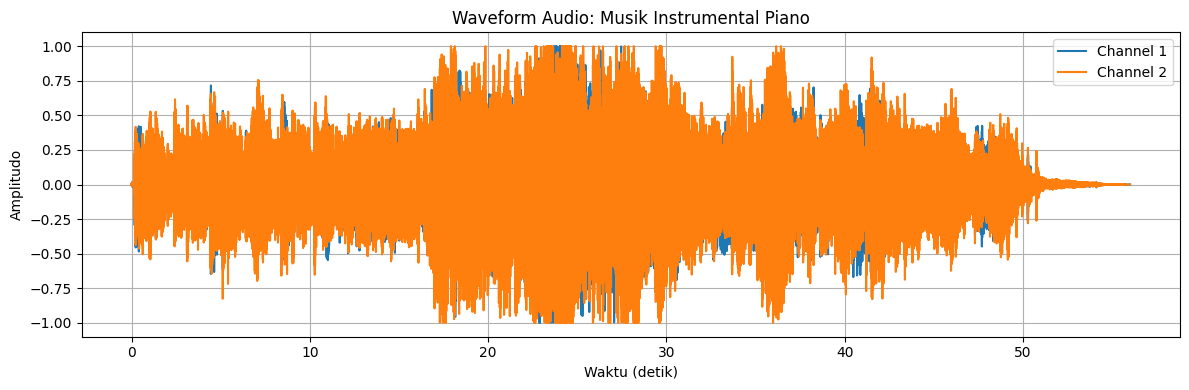

In [ ]:
plt.figure(figsize=(12, 4))
if y.ndim == 1:
    plt.plot(np.linspace(0, duration, len(y)), y, color='b')
else:
    for ch in range(y.shape[0]):
        plt.plot(np.linspace(0, duration, y.shape[1]), y[ch], label=f'Channel {ch+1}')
    plt.legend()
plt.title('Waveform Audio: Musik Instrumental Piano')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.tight_layout()
plt.show()

*Kalau dilihat dari waveform di atas, bagian bagian yang gelombangnya tinggi itu biasanya bagian musik yang keras atau rame, misalnya pas banyak tuts piano ditekan bareng atau bagian klimaks lagu. Sebaliknya, kalau gelombangnya kecil, berarti bagian musiknya pelan atau cuma satu atau dua nada yang dimainkan. Pola naik-turunnya juga kelihatan, jadi bisa tahu kapan lagu mulai pelan, terus tiba tiba keras, lalu pelan lagi. Waveform ini bikin kita gampang lihat dinamika lagu secara visual, tanpa harus dengerin dulu*


### A4. TODO: Spectrogram log-dB

**Instruksi:**
Hitung STFT dan tampilkan spectrogram dalam skala log-dB:
- Gunakan parameter standar (n_fft=1024, hop_length=256)
- Tampilkan dengan colorbar
- Label sumbu: waktu (detik) dan frekuensi (Hz)

**Analisis yang diperlukan:**
Jelaskan perbedaan informasi yang didapat dari spectrogram dibanding waveform.

*(Tambahkan sel kode di sini)*

---


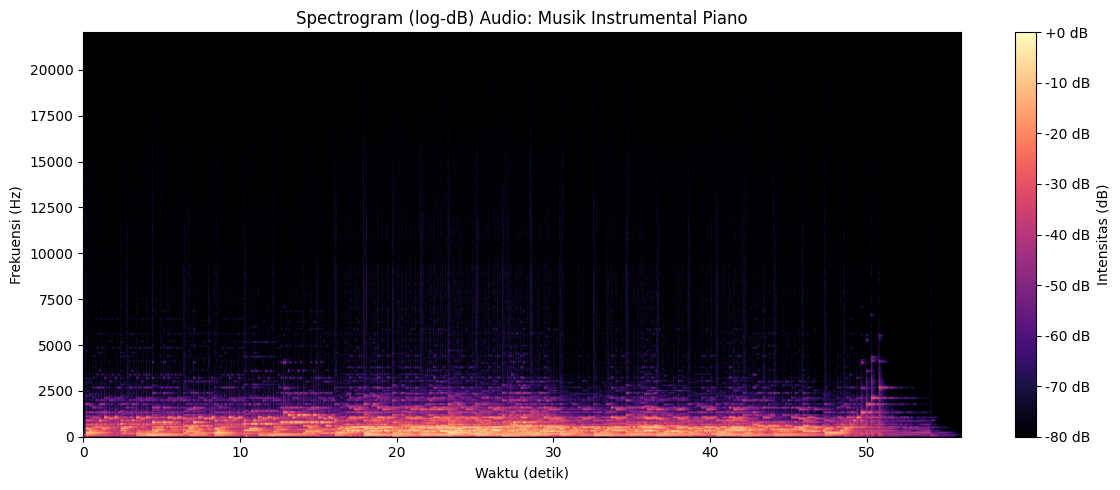

In [ ]:
 # Parameter STFT
n_fft = 1024
hop_length = 256

# Hitung STFT
D = librosa.stft(y if y.ndim == 1 else y[0], n_fft=n_fft, hop_length=hop_length)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 5))
img = plt.imshow(S_db, aspect='auto', origin='lower',
                 extent=[0, duration, 0, sr/2], cmap='magma')
plt.colorbar(img, format='%+2.0f dB', label='Intensitas (dB)')
plt.title('Spectrogram (log-dB) Audio: Musik Instrumental Piano')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.tight_layout()
plt.show()

*Kalau dari waveform, kita cuma bisa lihat seberapa keras atau pelan suara di tiap waktu, tapi nggak tahu nada atau frekuensi apa aja yang muncul. Nah, kalau pakai spectrogram, kita bisa lihat suara apa aja yang muncul di tiap detik, misal, nada tinggi atau rendah, dan kapan munculnya. Jadi, spectrogram itu kayak peta yang nunjukin isi suara secara lengkap, bukan cuma keras pelannya aja, tapi juga warna atau karakter suaranya.*


### A5. TODO: MFCC

**Instruksi:**
Hitung dan tampilkan minimal 13 koefisien MFCC sebagai heatmap:
- Sumbu X: waktu (frame)
- Sumbu Y: koefisien MFCC (1-13)
- Gunakan colorbar dan judul yang jelas

**Analisis yang diperlukan:**
Interpretasi sederhana: apakah pola MFCC stabil atau berubah-ubah? Apa potensi maknanya?

*(Tambahkan sel kode di sini)*

---


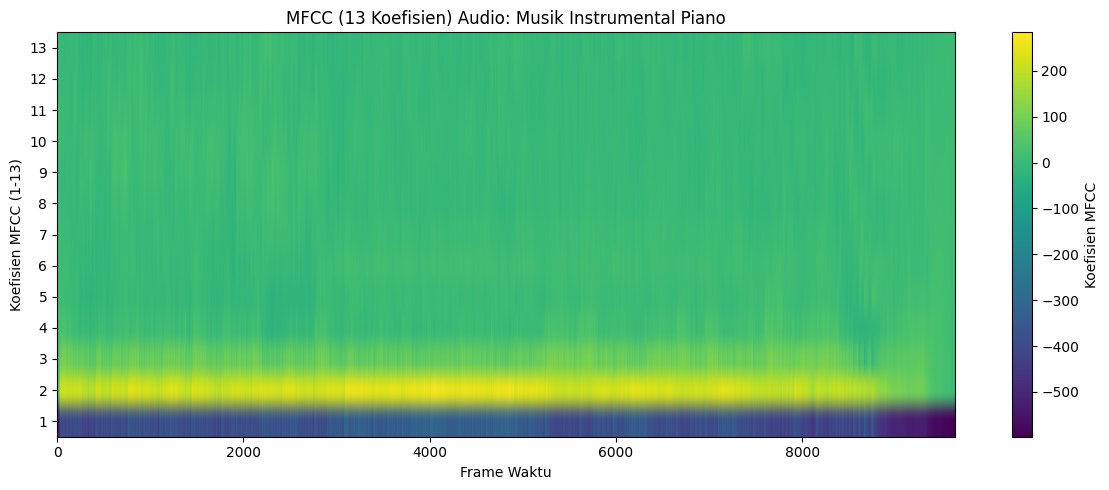

In [ ]:
# Hitung MFCC
n_mfcc = 13
mfcc = librosa.feature.mfcc(y=y if y.ndim == 1 else y[0], sr=sr, n_mfcc=n_mfcc, n_fft=1024, hop_length=256)

plt.figure(figsize=(12, 5))
img = plt.imshow(mfcc, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(img, label='Koefisien MFCC')
plt.title('MFCC (13 Koefisien) Audio: Musik Instrumental Piano')
plt.xlabel('Frame Waktu')
plt.ylabel('Koefisien MFCC (1-13)')
plt.yticks(np.arange(n_mfcc), np.arange(1, n_mfcc+1))
plt.tight_layout()
plt.show()

*Kalau lihat heatmap MFCC nya, kalau warnanya cenderung sama dari awal sampai akhir, berarti suara pianonya stabil, nggak banyak perubahan nada atau karakter. Tapi kalau warnanya sering berubah ubah, berarti ada variasi nada atau cara mainnya juga berubah. Jadi, pola MFCC yang berubah ubah biasanya nunjukin kalau lagunya dinamis, banyak variasi, atau ada bagian yang beda suasana*


### A6. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

1. **Perbedaan insight:** Apa perbedaan informasi yang didapat dari waveform versus spectrogram?

   *Kalau dari waveform, kita cuma bisa lihat bagian mana yang keras atau pelan, tapi nggak tahu nada apa aja yang muncul. Kalau spectrogram, kita bisa lihat nada nada apa aja yang muncul di tiap detik, jadi lebih detail soal isi suara, bukan cuma keras pelannya aja.*

2. **Pembelajaran dari MFCC:** Apa yang Anda pelajari dari visualisasi MFCC audio ini?

   *Dari visualisasi MFCC, kalau warnanya stabil berarti suara pianonya cenderung sama terus, nggak banyak perubahan. Tapi kalau warnanya sering berubah, berarti lagunya banyak variasi nada atau cara main pianonya juga beda-beda.*

# Bagian B — Gambar

### B1. Deskripsi Data

**TODO:** Jelaskan gambar yang akan Anda analisis:
- Jenis gambar: Apel
- Sumber: Istock by Getty Image
- Format file: JPG
- Alasan pemilihan: Gambar apel ini dipilih karena warnanya merah terang dan bentuknya bulat, jadi gampang banget buat dianalisis. Warna merahnya kontras sama latar belakang yang polos, jadi objek utamanya langsung kelihatan jelas. Selain itu, pencahayaannya juga bagus, permukaan apel kelihatan detail, dan ada sedikit warna lain kayak hijau di batangnya. Pokoknya, gambar ini simpel tapi informatif buat belajar analisis warna dan bentuk dasar.

**Path file:** `data/apple.jpg`

---


### B2. TODO: Baca & Tampilkan (RGB)

**Instruksi:**
Baca gambar dan tampilkan dengan benar dalam format RGB:
- Pastikan konversi warna benar (ingat perbedaan BGR vs RGB di OpenCV)
- Berikan judul yang deskriptif
- Hilangkan axis untuk tampilan yang bersih

**Analisis yang diperlukan:**
Jelaskan gambar secara ringkas (objek dominan, kondisi pencahayaan, komposisi warna).

*(Tambahkan sel kode di sini)*

---


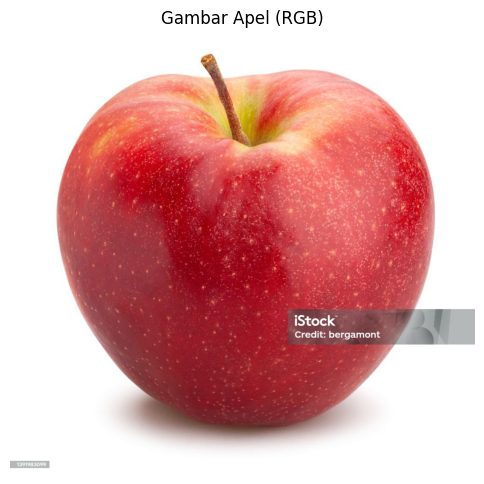

In [ ]:
# Baca gambar dan tampilkan dalam format RGB
img_path = 'data/apple.jpg'
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title('Gambar Apel (RGB)')
plt.axis('off')
plt.show()

*Di gambar ini yang paling menonjol jelas buah apelnya, warnanya merah cerah dan bentuknya bulat. Pencahayaannya cukup terang, jadi detail permukaan apel kelihatan jelas dan warnanya juga keluar. Komposisi warnanya didominasi merah, tapi ada sedikit warna hijau atau kuning di bagian batang dan pantulan cahaya, sedangkan latar belakangnya polos atau nggak terlalu ramai, jadi fokusnya tetap ke apel.*


### B3. TODO: Informasi Dasar

**Instruksi:**
Tampilkan informasi metadata gambar:
- Dimensi (Height × Width)
- Jumlah kanal
- Tipe data (dtype)
- Mode warna (jika relevan)
- Ukuran file dalam memori

**Analisis yang diperlukan:**
Jelaskan mengapa informasi ini penting untuk tahap preprocessing atau analisis lanjutan.

*(Tambahkan sel kode di sini)*

---


In [ ]:
# Tampilkan metadata dasar gambar

height, width, channels = img_rgb.shape
dtype = img_rgb.dtype
mode = "RGB"
file_size = os.path.getsize(img_path) / 1024  # dalam KB

print(f"Dimensi (Height x Width): {height} x {width}")
print(f"Jumlah kanal           : {channels}")
print(f"Tipe data (dtype)      : {dtype}")
print(f"Mode warna             : {mode}")
print(f"Ukuran file            : {file_size:.2f} KB")

Dimensi (Height x Width): 973 x 1024
Jumlah kanal           : 3
Tipe data (dtype)      : uint8
Mode warna             : RGB
Ukuran file            : 123.31 KB


*Informasi kayak ukuran gambar, jumlah kanal, tipe data, dan ukuran file itu penting banget sebelum ngolah gambar lebih lanjut. Soalnya, kalau mau resize, crop, atau ubah warna, kita harus tahu dulu dimensi dan jumlah channelnya. Tipe data juga ngaruh ke hasil proses, misal mau normalisasi atau konversi format. Ukuran file penting biar tahu gambar ini berat atau nggak kalau mau dipakai di aplikasi atau dikirim lewat internet. Jadi, semua info ini wajib dicek dulu sebelum lanjut ke tahap berikutnya.*


### B4. TODO: Histogram Warna

**Instruksi:**
Tampilkan histogram distribusi intensitas untuk channel R, G, B:
- Range: 0-255
- Plot terpisah atau overlay dengan warna sesuai channel
- Label sumbu: intensitas pixel dan frekuensi
- Legend yang jelas

**Analisis yang diperlukan:**
Analisis: channel mana yang dominan? Bagaimana kontras gambar? Seperti apa sebaran intensitasnya?

*(Tambahkan sel kode di sini)*

---


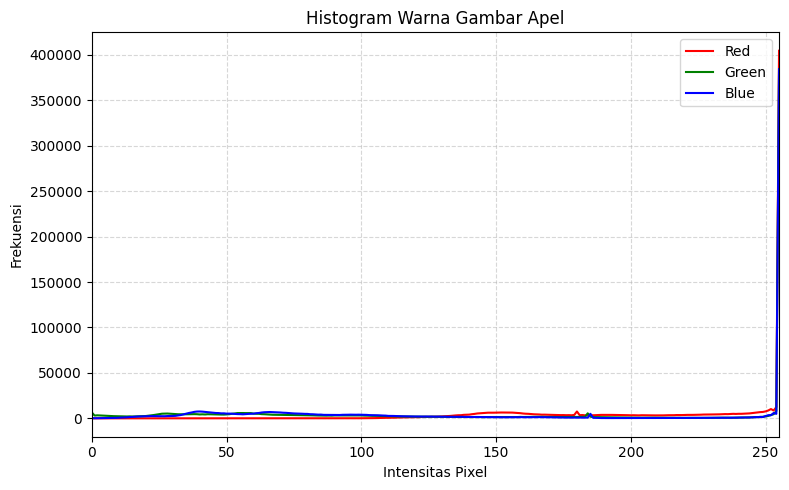

In [ ]:
# Tampilkan histogram distribusi intensitas untuk channel R, G, B

colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')
plt.figure(figsize=(8, 5))
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=channel_names[i])
    plt.xlim([0, 255])
plt.title('Histogram Warna Gambar Apel')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*Channel yang paling dominan di histogram jelas channel merah, sesuai sama warna utama apel di gambar. Channel hijau dan biru lebih rendah, jadi kontribusi warnanya nggak sebanyak merah. Sebaran intensitas di channel merah juga cukup lebar, artinya ada banyak variasi terang-gelap di warna merahnya, bikin gambar kelihatan kontras dan apel jadi makin menonjol dari latar belakang.*


### B5. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Relasi histogram dengan kesan visual:** Apa hubungan antara pola histogram yang Anda lihat dengan kesan visual gambar (terang/gelap, warna dominan, kontras)?

*Pola histogramnya nunjukin kalau warna merah paling dominan, jadi kesan visual gambar ini memang didominasi warna merah yang terang. Channel hijau dan biru lebih rendah, jadi warna lain cuma sedikit. Karena sebaran intensitas merahnya lebar, gambar jadi kelihatan kontras dan cerah, apelnya langsung kelihatan menonjol dari latar belakang yang polos. Jadi, histogram ini cocok sama kesan visual gambar yang terang, warna utama jelas, dan kontrasnya tinggi*

# Bagian C — Video

### C1. Deskripsi Data

**TODO:** Jelaskan video yang akan Anda analisis:
- Jenis video: Pemandangan
- Sumber: Rekaman Sendiri
- Durasi target: 16 detik
- Alasan pemilihan: Saya memilih video pemandangan pantai karena di dalamnya terdapat banyak perubahan visual yang mudah diamati, seperti gerakan ombak, perubahan langit, dan pergerakan air. Hal-hal tersebut membuat video ini cocok untuk dianalisis, terutama untuk mau belajar soal perubahan gambar dari waktu ke waktu.

**Path file:** `data/ombak_pantai.mp4`

---



### C2. TODO: Baca & Metadata

**Instruksi:**
Baca video dengan OpenCV dan tampilkan metadata:
- Resolusi (Width × Height)
- Frame rate (fps)
- Jumlah total frame
- Durasi (detik)
- Klasifikasi resolusi (HD, Full HD, 4K, dll.)

**Analisis yang diperlukan:**
Jelaskan pentingnya parameter-parameter tersebut untuk analisis video atau aplikasi tertentu.

*(Tambahkan sel kode di sini)*

---


In [ ]:
# Membaca video dan menampilkan metadata dasarnya

video_path = 'data/ombak_pantai.mp4'
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps if fps > 0 else 0

    # Klasifikasi resolusii
    if width >= 3840 and height >= 2160:
        res_class = "4K"
    elif width >= 1920 and height >= 1080:
        res_class = "Full HD"
    elif width >= 1280 and height >= 720:
        res_class = "HD"
    else:
        res_class = "SD"

    print(f"Resolusi           : {width} x {height} px")
    print(f"Frame rate (fps)   : {fps:.2f}")
    print(f"Jumlah total frame : {total_frames}")
    print(f"Durasi             : {duration:.2f} detik")
    print(f"Klasifikasi        : {res_class}")

cap.release()

Resolusi           : 1280 x 720 px
Frame rate (fps)   : 30.00
Jumlah total frame : 477
Durasi             : 15.90 detik
Klasifikasi        : HD


*Parameter kayak resolusi, fps, jumlah frame, dan durasi itu penting banget buat analisis video atau aplikasi tertentu. Resolusi menentukan seberapa jelas detail gambar di video, jadi kalau buat presentasi atau media sosial, resolusi tinggi bikin tampilan lebih tajam. Fps (frame per detik) ngaruh ke seberapa halus gerakan di video, makin tinggi fps makin mulus videonya. Jumlah frame dan durasi penting buat tahu berapa lama video berjalan dan seberapa banyak data yang harus diproses. Semua parameter ini harus disesuaikan sama kebutuhan.*


### C3. TODO: Tampilkan 3 Frame (Awal–Tengah–Akhir)

**Instruksi:**
Ambil dan tampilkan 3 frame representatif:
- Frame pertama (index 0)
- Frame tengah (index ~total_frame/2)
- Frame terakhir (index total_frame-1)
- **Konversi BGR→RGB** sebelum ditampilkan
- Subplot dengan judul frame dan timestamp

**Analisis yang diperlukan:**
Deskripsikan perbedaan visual antar frame dan apa yang dapat dipelajari dari sampel frame ini.

*(Tambahkan sel kode di sini)*

---


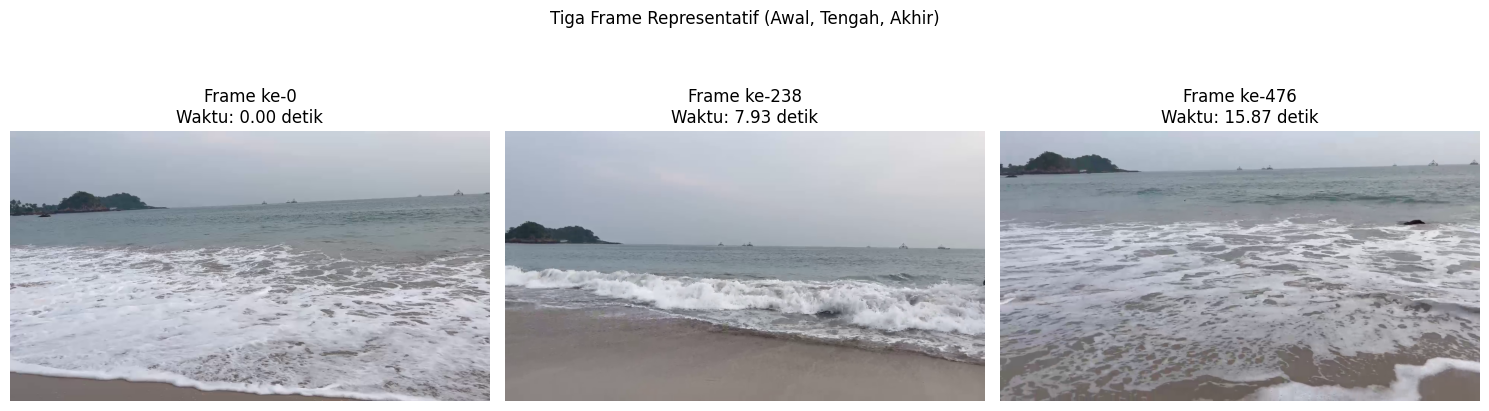

In [ ]:
video_path = 'data/ombak_pantai.mp4'
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_idxs = [0, total_frames // 2, total_frames - 1]
    frames = []
    timestamps = []

    for idx in frame_idxs:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame_rgb)
            timestamps.append(idx / fps)
        else:
            frames.append(None)
            timestamps.append(None)
    cap.release()

    plt.figure(figsize=(15, 5))
    for i, (img, t) in enumerate(zip(frames, timestamps)):
        plt.subplot(1, 3, i+1)
        if img is not None:
            plt.imshow(img)
            plt.title(f"Frame ke-{frame_idxs[i]}\nWaktu: {t:.2f} detik")
        else:
            plt.text(0.5, 0.5, "Frame tidak ditemukan", ha='center', va='center')
        plt.axis('off')
    plt.suptitle("Tiga Frame Representatif (Awal, Tengah, Akhir)")
    plt.tight_layout()
    plt.show()

*Kalau dilihat dari tiga frame yang diambil, tiap frame punya tampilan yang berbeda. Frame pertama masih kelihatan suasana awal, ombaknya belum terlalu besar dan langitnya masih cerah. Di frame tengah, ada perubahan, ombaknya sedikit tinggi, warna langit juga agak berubah. Frame terakhir suasananya sudah beda lagi, cahaya matahari berubah dan ombak sudah reda. Dari tiga frame ini, bisa dilihat kalau video memang berisi perubahan visual dari waktu ke waktu, dan ini penting buat analisis gerakan, perubahan suasana, atau mendeteksi momen momen penting di dalam video.*

### C4. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Kesesuaian parameter:** Apakah fps dan resolusi video ini sesuai untuk use case pilihan Anda (misalnya: media sosial, kuliah daring, presentasi, dll.)? Jelaskan alasan singkat.

*Fps dan resolusi video ini menurut saya sudah sesuai untuk kebutuhan seperti media sosial atau presentasi. Dengan fps yang cukup, gerakan di video terlihat halus, dan resolusi HD/Full HD sudah cukup jelas untuk ditampilkan di layar laptop atau smartphone tanpa membuat ukuran file terlalu berat*

# Perbandingan & Kesimpulan

## Perbandingan Representasi Media

**TODO:** Bandingkan secara ringkas representasi dan visualisasi ketiga media:

### Audio (1D - Temporal)
- Representasi: Data berupa gelombang suara yang berubah terhadap waktu (amplitudo vs waktu)
- Visualisasi utama: Waveform, spectrogram, MFCC
- Informasi yang diperoleh: Bisa tahu pola suara, bagian keras atau pelan, perubahan nada, dan karakter suara

### Gambar (2D - Spasial)  
- Representasi: Kumpulan pixel dua dimensi, tiap pixel punya nilai warna
- Visualisasi utama: Tampilan gambar, histogram warna
- Informasi yang diperoleh: Bisa lihat objek utama, warna dominan, dan sebaran intensitas warna

### Video (2D + Waktu - Spatio-temporal)
- Representasi: Kumpulan gambar (frame) yang ditampilkan berurutan sesuai waktu
- Visualisasi utama: Cuplikan frame, metadata (resolusi, fps, durasi)
- Informasi yang diperoleh: Bisa melihat perubahan visual, gerakan, dan dinamika dalam video

---



## Refleksi Pembelajaran

### 3 Poin yang Saya Pelajari:
1. Cara membaca dan menampilkan data audio, gambar, dan video beserta metadatanya.
2. Setiap media punya cara representasi dan analisis yang berbeda.
3. Visualisasi sangat membantu untuk memahami isi dan karakteristik data multimedia.

### 2 Hal yang Masih Membingungkan/Ingin Diperdalam:
1. Cara kerja detail fitur MFCC dan penggunaannya di aplikasi nyata.
2. Analisis otomatis pada video, misalnya deteksi objek atau tracking gerakan.

---



## Sumber Data & Referensi

**TODO:** Cantumkan semua sumber data dan referensi yang digunakan:

- **Audio:** Free Music Archive (audio_piano.wav)
- **Gambar:** Istock by Getty Image (apple.jpg)
- **Video:** Rekaman sendiri (ombak_pantai.mp4)
- **Referensi teknis:** Dokumentasi Librosa, OpenCV, Matplotlib, materi kuliah, Copilot

# Rubrik Penilaian

## Distribusi Bobot Penilaian

| **Aspek Penilaian** | **Bobot** | **Deskripsi** |
|---|---|---|
| **Kelengkapan** | **35%** | Semua langkah inti dikerjakan sesuai checklist |
| **Kualitas Visualisasi** | **20%** | Judul, label sumbu, colorbar, legend, keterbacaan plot |
| **Analisis & Interpretasi** | **30%** | Kemampuan interpretasi hasil, bukan sekadar output mentah |
| **Kerapihan & Struktur** | **10%** | Markdown jelas, kode modular, dokumentasi baik |
| **Orisinalitas & Penguasaan** | **5%** | Pemahaman saat presentasi acak |

---

## Detail Kriteria Penilaian

### 🏆 Kelengkapan (35%)
- ✅ Semua 4 visualisasi audio (metadata, waveform, spectrogram, MFCC)
- ✅ Semua 3 visualisasi gambar (display RGB, metadata, histogram)  
- ✅ Semua 2 visualisasi video (metadata, frame extraction)
- ✅ Analisis ringkas untuk setiap bagian

### 📊 Kualitas Visualisasi (20%)
- Plot memiliki judul yang informatif dan deskriptif
- Label sumbu X dan Y jelas dan sesuai
- Colorbar/legend tersedia jika diperlukan
- Ukuran plot proporsional dan mudah dibaca

### 🧠 Analisis & Interpretasi (30%)
- Interpretasi menunjukkan pemahaman konsep
- Analisis kontekstual, bukan sekadar deskripsi output
- Mampu menghubungkan hasil dengan teori
- Refleksi pembelajaran yang thoughtful

### 📝 Kerapihan & Struktur (10%)
- Markdown terstruktur dengan heading yang konsisten
- Kode bersih, terkompartemen, dan mudah dibaca
- Dokumentasi yang memadai
- Flow logical dari satu bagian ke bagian lain

### 🎯 Orisinalitas & Penguasaan (5%)
- **PENTING:** Jika saat presentasi acak Anda tidak mampu menjelaskan kode yang Anda tulis atau menunjukkan ketergantungan buta pada AI/copy-paste, **nilai tugas akan dianggap 0**.
- Kemampuan menjelaskan logika dan alur pemikiran
- Pemahaman konsep di balik implementasi kode

## Proporsi Penilaian Total
- Proporsi penilaian hanya 80%, 20% lagi akan didasarkan pada kecepatan pengumpulan tugas
- Sehingga: 0.8 * penilaian dosen + nilai waktu pengumpulan

# Aturan Kejujuran Akademik

## 📖 Penggunaan Referensi & AI yang Diperbolehkan

Anda **BOLEH** menggunakan:
- ✅ Dokumentasi resmi library (NumPy, Matplotlib, Librosa, OpenCV)
- ✅ Tutorial dan contoh kode dari sumber terpercaya
- ✅ AI tools (ChatGPT, GitHub Copilot, dll.) sebagai **alat bantu pembelajaran**
- ✅ Diskusi dengan teman untuk pemahaman konsep

## ⚠️ Syarat & Batasan WAJIB

Namun Anda **HARUS**:
- 🧠 **Memahami setiap baris kode** yang Anda masukkan ke notebook
- 📝 **Menulis interpretasi dengan kata-kata sendiri**, bukan hasil copy-paste
- 📚 **Mencantumkan sumber data dan referensi** yang digunakan, termasuk transkrip percakapan dengan AI dalam link atau teks
- 🎯 **Mampu menjelaskan logika dan alur pemikiran** saat presentasi acak

## ❌ Pelanggaran yang Berakibat Nilai 0

- **Plagiarisme atau penyalinan buta** dari sumber manapun
- **Copy-paste kode tanpa pemahaman** dan tidak dapat menjelaskan
- **Menggunakan AI untuk mengerjakan seluruh tugas** tanpa pembelajaran personal
- **Tidak dapat menjawab pertanyaan dasar** tentang kode yang dikumpulkan
- **Menyalin pekerjaan teman** atau bekerjasama dalam pengerjaan individual

## 🎯 Persiapan Presentasi Acak

**Kemungkinan pertanyaan yang akan ditanyakan:**
- "Jelaskan mengapa Anda menggunakan parameter ini di STFT?"
- "Apa arti dari pola yang terlihat di MFCC?"
- "Mengapa perlu konversi BGR ke RGB?"
- "Interpretasikan hasil histogram yang Anda buat"
- "Bagaimana cara kerja spectrogram?"

**Tips sukses:**
- Pahami konsep dasar setiap teknik yang digunakan
- Latih menjelaskan dengan bahasa sederhana
- Siapkan justifikasi untuk setiap pilihan parameter
- Kuasai interpretasi setiap visualisasi yang dibuat

# Panduan Pengumpulan

## 📁 Berkas yang Harus Dikumpulkan

### Wajib:
1. **Notebook Jupyter** (.ipynb) dengan nama: `NIM_Nama_TugasMultimedia.ipynb`
   - Contoh: `123456789_JohnDoe_TugasMultimedia.ipynb`
2. **PDF hasil render dari notebook**

---

## 📅 Informasi Pengumpulan

---

## ✅ Checklist Sebelum Submit

- [✅] Semua cell sudah dijalankan dan menampilkan output
- [✅] Nama file sesuai format: `NIM_Worksheet2.ipynb` dan `NIM_Worksheet2.pdf`
- [✅] Semua TODO sudah diisi dengan lengkap
- [✅] Analisis dan interpretasi sudah ditulis untuk setiap bagian
- [✅] Sumber data dan referensi sudah dicantumkan

---

### Export ke PDF:
- File → Save and Export Notebook As →  HTML
- Buka HTML di browser -> Save as PDF